# **Lennard-Jones gas**

In this code we simulate ...

**Credits**
* Juan Andrés Guarín Rojas
* [GitHub](https://github.com/AndresGuarin)


This notebook follows the next order
* [1. Computational scheme](#sec_1)

# **Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ECond.simulation.solver as solver

import matplotlib.animation as animation
from datetime import datetime

## **Some ideas**

* Only calculate forces for the moving particles (electrons)

# **1. Computational scheme** <a class="anchor" id="sec_1"></a>

The Coulomb's force of a ith particle due to the presence of a jth particle is given by
$$\vec{F}_i^{\,(Coulomb)} = \frac{1}{4\pi\epsilon_0}\frac{q_i q_j}{r_{ij}^3}\vec{r}_{ij}$$
where $\vec{r}_{ij}=\vec{r}_i-\vec{r}_j$ Now, the Lorentz force of a ith particle due to the presence of the external fields $\vec{E}$ and $\vec{B}$ is
$$\vec{F}_i^{\,(Lorentz)} = q_i\left(\vec{E} + \vec{v}_i\times\vec{B} \right)\,,$$
where $\vec{v}_i$ is the velocity of the ith particle.


For implementing this equations into the code we define the next dimensionless quantities:
$$\bar{t}=\sqrt{\frac{e^2}{4\pi\epsilon_0 m_e\sigma^3}}t\,,$$
$$ \vec{r}' = \frac{\vec{r}}{\sigma}\,,$$
$$ \vec{v}' = \frac{d\vec{r}'}{d\bar{t}}$$
$$ \bar{r}_{ij} =\frac{r_{ij}}{\sigma}\,, $$
$$\bar{q}_i = \frac{q_i}{e}$$
where $\sigma=361.5\times 10^{-12}[\text{m}]$ is the lattice constant cristal structure of copper, $e$ is the elemental charge and $m_e$ is the electron rest mass. We also define the next dimensionless fields

$$\vec{E}' = \frac{4\pi\epsilon_0 \sigma^2}{e}\vec{E}$$
$$\vec{B}' = \sqrt{\frac{4\pi\epsilon_0\sigma^3}{m_e}} \vec{B}$$

With this definitions the Newton's Law of motion for the electrons is left as
$$ \frac{d^2\vec{r}'_{i}}{d \bar{t}^2}=\sum\limits_{j=1}^{N} \frac{\bar{q}_i \bar{q}_j}{\bar{r}_{ij}^2}\hat{r}'_{ij} + \bar{q}_i\left(\vec{E}'+\vec{v}'_i\times\vec{B}' \right) \,.$$ 

# **2. Test**

In [ ]:
# Choose parameters 
h = 0.01; N = 2000; Np = 3

# Set intial conditions
#free charges
X0 = np.array([0.5,-0.5,0])
Y0 = np.array([0,0,-0.5])
Vx0 = np.array([0,0,1])
Vy0 = np.array([1,1,0])
Q = -np.ones(Np)

#nuclei
t = np.arange(-4,5,1)
XC, YC  = np.meshgrid(t,t)
XC = XC.flatten()
YC = YC.flatten()
QC = np.ones(len(XC))

# Set external fields
def B0(X,Y,t):
    return X*0 #In order: [Bz]

def E0(X,Y,t):
     return [X*0, X*0] #In order: [Ex, Ey]

def B1(X,Y,t): 
     return X*0 - 10

def E1(X,Y,t):
     return [X*0, (Y>=-1)*(Y<=1)*(-1)] #In order: [Ex, Ey]

sim = solver.ECond(h,N,Np,E0,B0)
s = sim.simulate([X0,Y0,Vx0,Vy0,Q,XC,YC,QC])

self1 = sim.get_self()

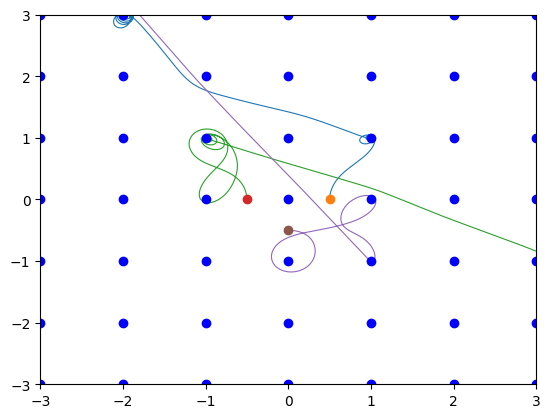

In [22]:
for i in range(Np):
    X = s[0][:,i]
    Y = s[1][:,i]
    plt.plot(X,Y,lw=0.8)
    plt.plot(X[0],Y[0],'o')
plt.plot(XC,YC,'ob')

D=3
plt.xlim(-D,D)
plt.ylim(-D,D)
plt.show()

In [34]:
%matplotlib auto
%matplotlib auto

Using matplotlib backend: QtAgg
Using matplotlib backend: QtAgg


In [35]:
%matplotlib inline

In [13]:
X1 = np.array([1,2,3])
X2 = np.array([4,5,6,7,8,9])
X = np.concatenate([X1,X2])

A, B = np.meshgrid(X,X); dX = A-B
display(X)
display(dX)
display(np.sum(dX,axis=0))

A, B = np.meshgrid(X1,X); dX = A-B
display(dX)
display(np.sum(dX,axis=0))


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [-1,  0,  1,  2,  3,  4,  5,  6,  7],
       [-2, -1,  0,  1,  2,  3,  4,  5,  6],
       [-3, -2, -1,  0,  1,  2,  3,  4,  5],
       [-4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3],
       [-6, -5, -4, -3, -2, -1,  0,  1,  2],
       [-7, -6, -5, -4, -3, -2, -1,  0,  1],
       [-8, -7, -6, -5, -4, -3, -2, -1,  0]])

array([-36, -27, -18,  -9,   0,   9,  18,  27,  36])

array([[ 0,  1,  2],
       [-1,  0,  1],
       [-2, -1,  0],
       [-3, -2, -1],
       [-4, -3, -2],
       [-5, -4, -3],
       [-6, -5, -4],
       [-7, -6, -5],
       [-8, -7, -6]])

array([-36, -27, -18])

In [25]:
I = np.eye(4)
display(I)
display(I[:,:1])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

array([[1.],
       [0.],
       [0.],
       [0.]])

In [26]:
len(np.ones(1))

1

In [7]:
np.meshgrid(np.zeros(2),np.zeros(3))

[array([[0., 0.],
        [0., 0.],
        [0., 0.]]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.]])]